In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')



In [7]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [8]:
heart_data= pd.read_csv("heart.csv")
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
heart_data.shape

(918, 12)

In [11]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
heart_data.describe(include='O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [13]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#EDA

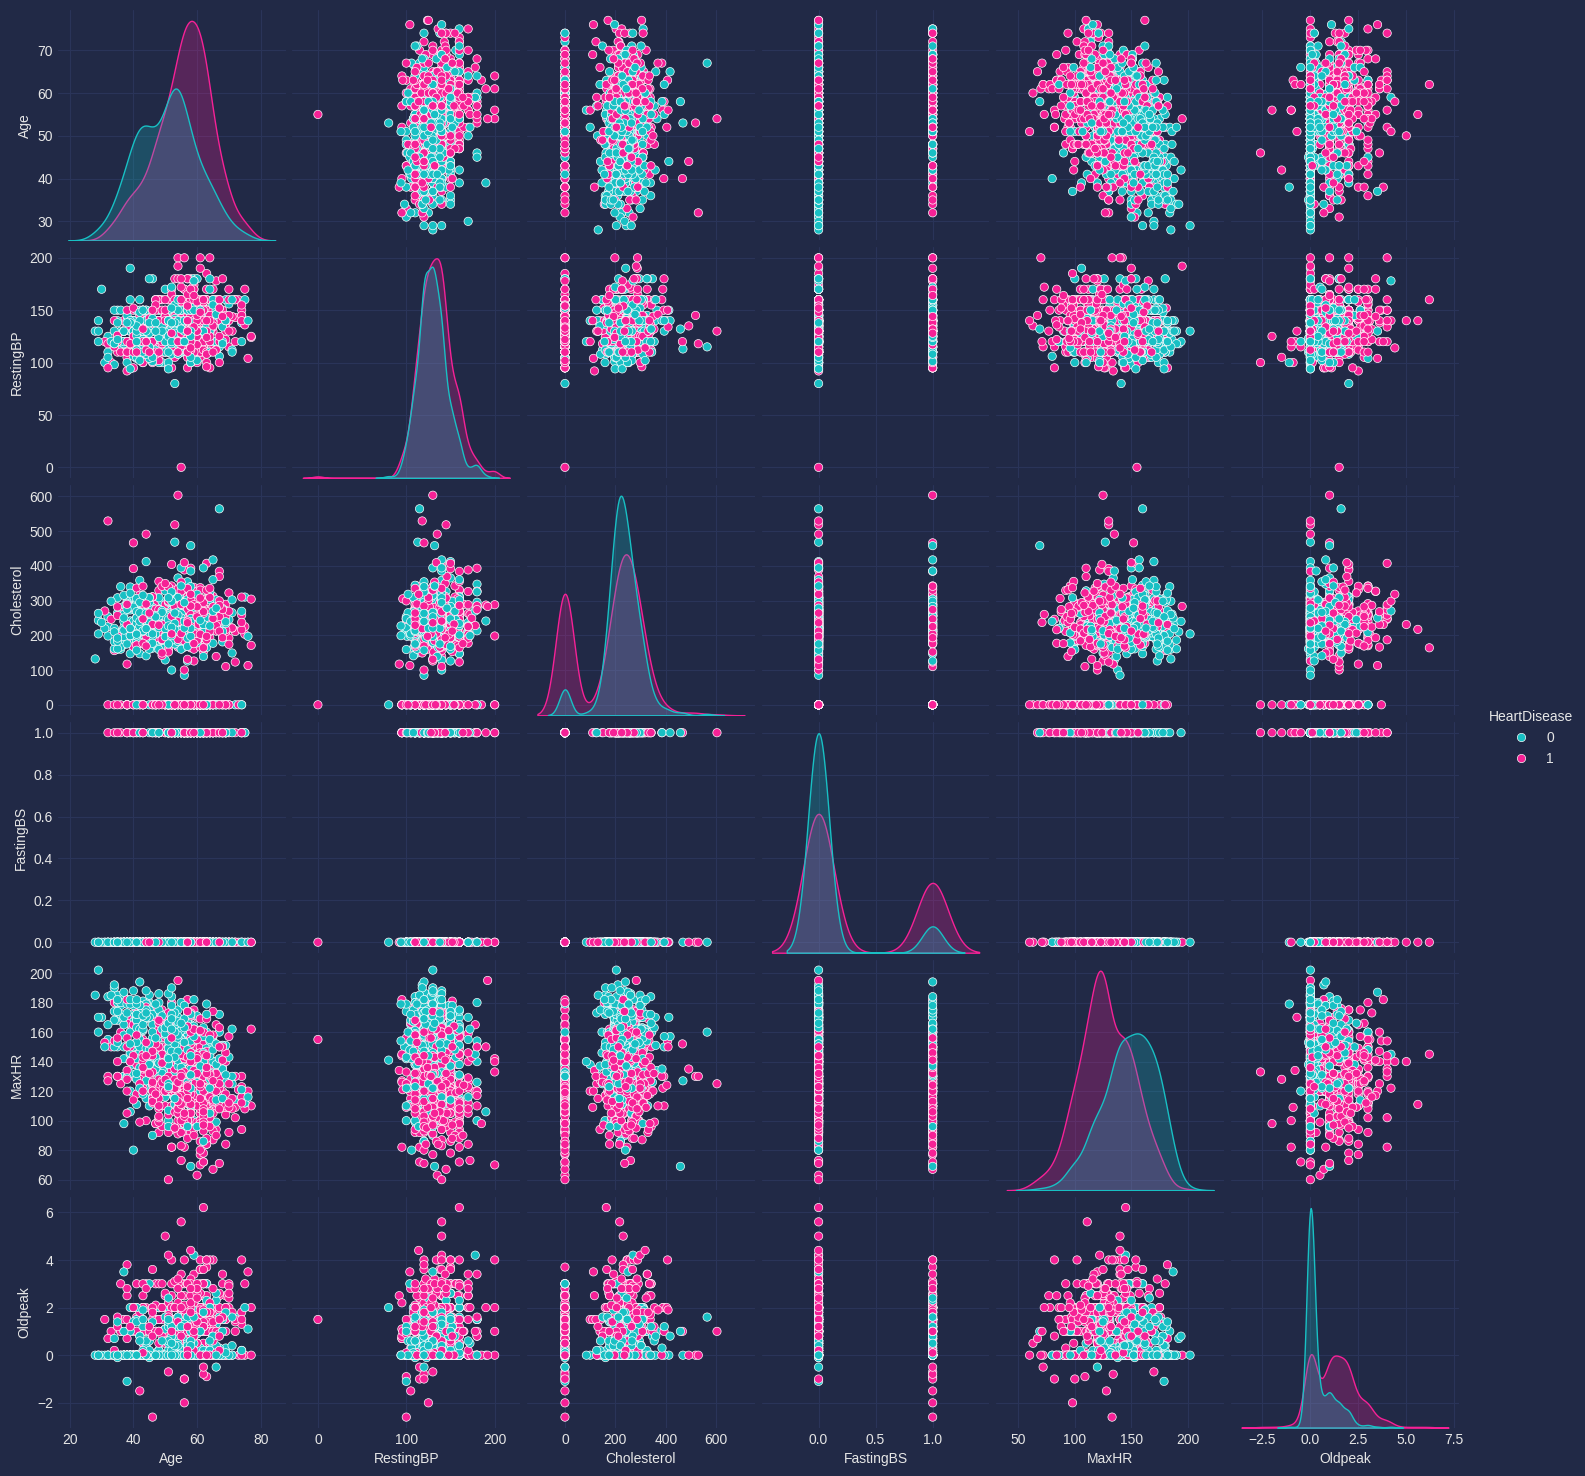

In [14]:
sns.pairplot(heart_data,hue='HeartDisease')

In [15]:
heart_data.HeartDisease.value_counts()

,count
HeartDisease,
1,508
0,410


Text(0.5, 1.0, 'Number Of HeartDisease')

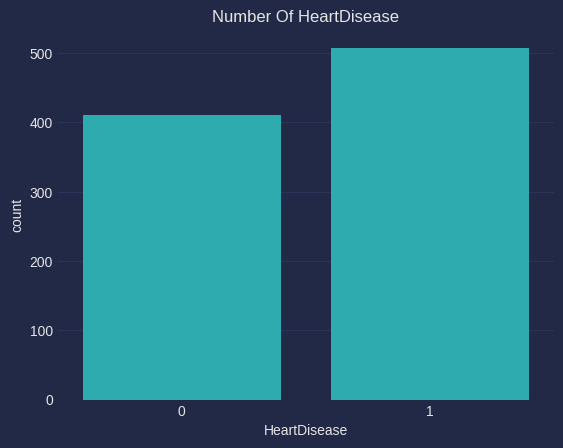

In [16]:
sns.countplot(x='HeartDisease',data=heart_data)
plt.title("Number Of HeartDisease")

In [17]:
heart_data.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

In [18]:
px.histogram(heart_data,x='Sex',color='HeartDisease',barmode='group',title='Number Of HeartDisease In Sex')

In [19]:
heart_data[heart_data['HeartDisease']==1]['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,392
NAP,72
ATA,24
TA,20


In [20]:
fig=px.pie(heart_data,values='HeartDisease',names='ChestPainType',title='Number Of HeartDisease In ChestPainType',template='plotly_dark')
fig.update_traces(textposition='inside',textinfo='percent+label')

In [21]:
heart_data.pivot_table(index='Sex',columns='RestingECG',values='HeartDisease',aggfunc='mean')

RestingECG,LVH,Normal,ST
Sex,,,
F,0.297872,0.245763,0.250000
M,0.652482,0.589862,0.733333


array([<Axes: ylabel='LVH'>, <Axes: ylabel='Normal'>, <Axes: ylabel='ST'>],
      dtype=object)

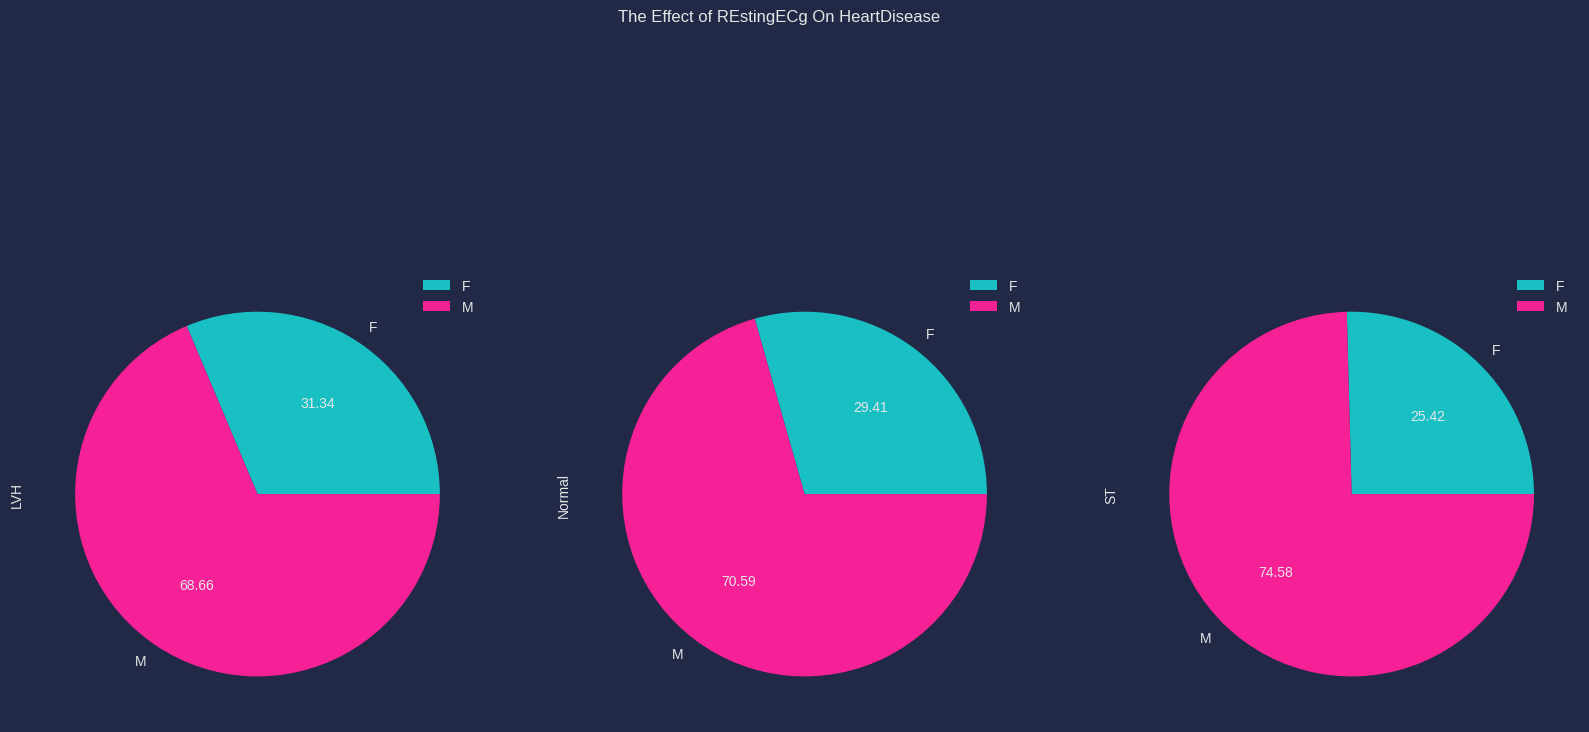

In [22]:
heart_data.pivot_table(index='Sex',columns='RestingECG',values='HeartDisease',aggfunc='mean').plot.pie(subplots=True,figsize=(20,10),autopct='%.2f',title='The Effect of REstingECg On HeartDisease')

In [23]:
heart_data.groupby(['ExerciseAngina','HeartDisease'])['HeartDisease'].count()

ExerciseAngina  HeartDisease
N               0               355
                1               192
Y               0                55
                1               316
Name: HeartDisease, dtype: int64

In [24]:
px.histogram(heart_data,x='ExerciseAngina',title='Effect of Exercise in heartDiseas',color='HeartDisease',barmode='group')

In [25]:
heart_data[heart_data['HeartDisease']==1]['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,381
Up,78
Down,49


In [26]:
fig=px.pie(heart_data,values='HeartDisease',names='ST_Slope',title='Number of HeartDisease In ST_Slope',template='plotly_dark')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(
    annotations=[dict(text='ST slope', x=0.5, y=0.5, font_size=20, showarrow=False)])

In [27]:
heart_data.pivot_table(index='HeartDisease',columns='Sex',values='Cholesterol',aggfunc='mean').style.background_gradient(cmap='Reds')

Sex,F,M
HeartDisease,,
0,247.440559,216.239700
1,223.340000,170.766376


<Axes: ylabel='Density'>

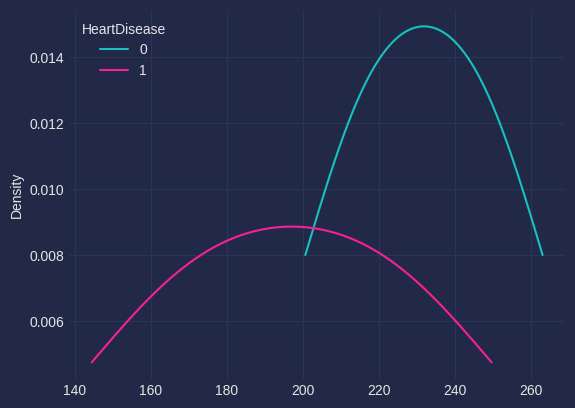

In [28]:
heart_data.pivot_table(index='Sex',columns='HeartDisease',values='Cholesterol',aggfunc='mean').plot(kind="kde")

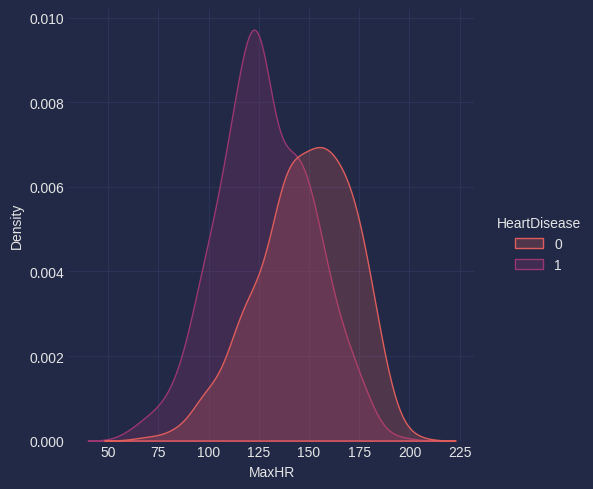

In [29]:
sns.displot(heart_data,x='MaxHR',hue='HeartDisease',fill=True,kind='kde',palette='flare')

In [30]:
px.violin(heart_data,y='Oldpeak',x='HeartDisease',color='HeartDisease',template='plotly_dark',title='Distribution of old peak by heart Disease')

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

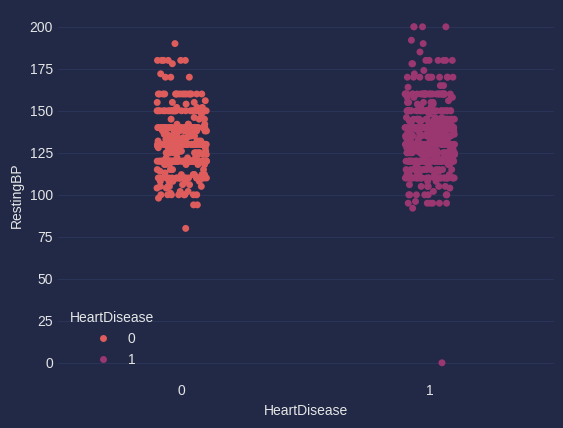

In [31]:
sns.stripplot(x='HeartDisease',y='RestingBP',data=heart_data,hue='HeartDisease',palette='flare')

In [32]:
heart_data.groupby(['FastingBS','HeartDisease'])['HeartDisease'].count()

FastingBS  HeartDisease
0          0               366
           1               338
1          0                44
           1               170
Name: HeartDisease, dtype: int64

In [33]:
px.histogram(heart_data,x='FastingBS',color='HeartDisease',barmode='group',title='Effect of FastingBS On HeartDisease',template='plotly_dark')

Data Preprocessing

In [34]:
heart_data.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [35]:
heart_data.drop_duplicates(inplace=True)
heart_data.shape

(918, 12)

In [36]:
heart_data['Age_Cat']=pd.cut(heart_data['Age'],4)
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Cat
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,"(27.951, 40.25]"
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,"(40.25, 52.5]"
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,"(27.951, 40.25]"
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,"(40.25, 52.5]"
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,"(52.5, 64.75]"


In [37]:
heart_data[["Age_Cat",'HeartDisease']].groupby('Age_Cat',as_index=False).mean().sort_values(by='HeartDisease',ascending=False)

,Age_Cat,HeartDisease
3,"(64.75, 77.0]",0.699029
2,"(52.5, 64.75]",0.647196
1,"(40.25, 52.5]",0.431973
0,"(27.951, 40.25]",0.344086


In [38]:
px.histogram(heart_data,x='HeartDisease',barmode='group',title='Heart Disease In Age Category',template='plotly_dark',color='HeartDisease',facet_col='Age_Cat')

In [39]:
heart_data.loc[heart_data['RestingBP']<=120,'RestingBP']=0
heart_data.loc[heart_data['RestingBP']>120,'RestingBP']=1

In [40]:
heart_data["Cholesterol_cat"]=pd.cut(heart_data["Cholesterol"],3)
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Cat,Cholesterol_cat
0,40,M,ATA,1,289,0,Normal,172,N,0.0,Up,0,"(27.951, 40.25]","(201.0, 402.0]"
1,49,F,NAP,1,180,0,Normal,156,N,1.0,Flat,1,"(40.25, 52.5]","(-0.603, 201.0]"
2,37,M,ATA,1,283,0,ST,98,N,0.0,Up,0,"(27.951, 40.25]","(201.0, 402.0]"
3,48,F,ASY,1,214,0,Normal,108,Y,1.5,Flat,1,"(40.25, 52.5]","(201.0, 402.0]"
4,54,M,NAP,1,195,0,Normal,122,N,0.0,Up,0,"(52.5, 64.75]","(-0.603, 201.0]"


In [41]:
heart_data[['Cholesterol_cat','HeartDisease']].groupby('Cholesterol_cat',as_index=False).mean().sort_values(by='HeartDisease',ascending=False)

,Cholesterol_cat,HeartDisease
0,"(-0.603, 201.0]",0.646341
2,"(402.0, 603.0]",0.615385
1,"(201.0, 402.0]",0.499133


In [42]:
heart_data['Cholesterol_cat'].value_counts()

,count
Cholesterol_cat,
"(201.0, 402.0]",577
"(-0.603, 201.0]",328
"(402.0, 603.0]",13


In [43]:
px.histogram(heart_data,x='HeartDisease',facet_col='Cholesterol_cat',barmode='group',color='HeartDisease',title='Heart Disease In Cholesterol Category',template='plotly_dark')

In [44]:
heart_data["MaxHR_cat"]=pd.cut(heart_data["MaxHR"],3)

In [45]:
heart_data[["MaxHR_cat","HeartDisease"]].groupby("MaxHR_cat",as_index=False).mean().sort_values(by="HeartDisease",ascending=False).style.background_gradient(cmap='Reds')

,MaxHR_cat,HeartDisease
0,"(59.858, 107.333]",0.812500
1,"(107.333, 154.667]",0.618538
2,"(154.667, 202.0]",0.285714


In [46]:
px.histogram(heart_data,x='HeartDisease',facet_col='MaxHR_cat',barmode='group',color='HeartDisease',marginal='rug',template='plotly_dark',title='Distribution of maximum heart rate achieved by disease')

In [47]:
heart_data["Oldpeak_cat"]=pd.cut(heart_data["Oldpeak"],2)

In [48]:
heart_data[["Oldpeak_cat","HeartDisease"]].groupby("Oldpeak_cat",as_index=False).mean().sort_values(by="HeartDisease",ascending=False).style.background_gradient(cmap='Reds')

,Oldpeak_cat,HeartDisease
1,"(1.8, 6.2]",0.863388
0,"(-2.609, 1.8]",0.476190


In [49]:
px.histogram(heart_data,x='HeartDisease',facet_col='Oldpeak_cat',barmode='group',color='HeartDisease',marginal='rug',template='plotly_dark',title='Distribution of Oldpeak categories by disease')

In [50]:
heart_data.drop(['Age_Cat','Cholesterol_cat','MaxHR_cat','Oldpeak_cat'],axis=1,inplace=True)

In [51]:
heart_data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,1,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,1,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,1,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,1,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,1,195,0,Normal,122,N,0.0,Up,0


In [52]:
to_categorical=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

from sklearn.preprocessing import LabelEncoder

L_encoder=LabelEncoder()

for label in to_categorical:
    heart_data[label]=L_encoder.fit_transform(heart_data[label])

In [53]:
heart_data["Age"]=pd.cut(heart_data["Age"],4,labels=[1,2,3,4])
heart_data["Cholesterol"]=pd.cut(heart_data["Cholesterol"],3,labels=[1,2,3])
heart_data["MaxHR"]=pd.cut(heart_data["MaxHR"],3,labels=[1,2,3])
heart_data["Oldpeak"]=pd.cut(heart_data["Oldpeak"],2,labels=[1,2])

In [54]:
heart_data['Age']=heart_data['Age'].astype(int)
heart_data['Cholesterol']=heart_data['Cholesterol'].astype(int)
heart_data['MaxHR']=heart_data['MaxHR'].astype(int)
heart_data['Oldpeak']=heart_data['Oldpeak'].astype(int)

In [55]:
heart_data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,1,1,1,2,0,1,3,0,1,2,0
1,2,0,2,1,1,0,1,3,0,1,1,1


Text(0.5, 1.0, 'Data correlations')

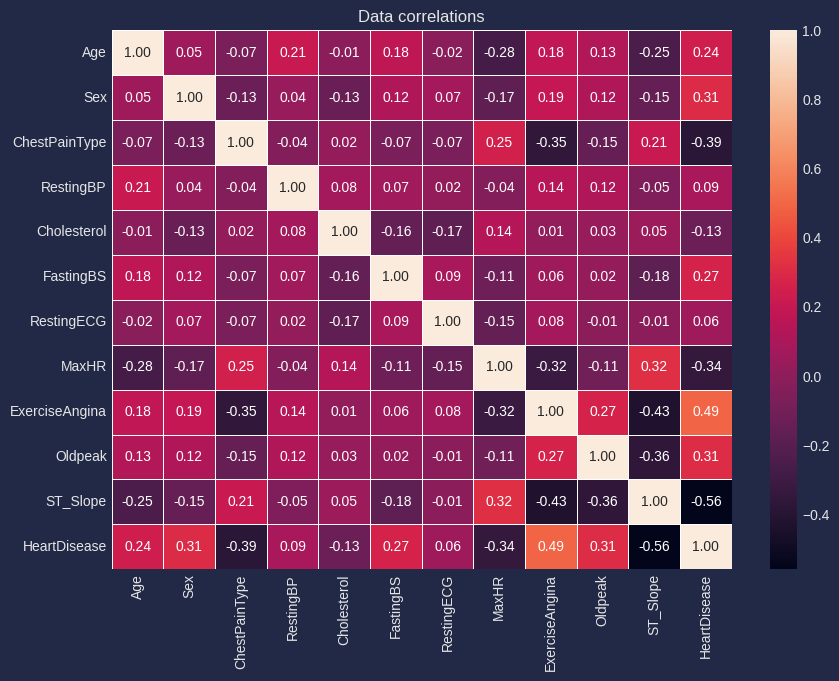

In [56]:
correlation=heart_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5)
plt.title("Data correlations")

Text(0.5, 1.0, 'Maximum six features affect the diseas')

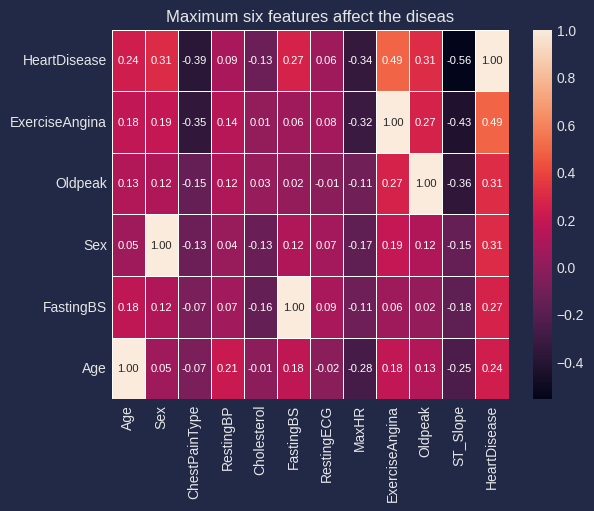

In [57]:
max_6_corr=correlation.nlargest(6,"HeartDisease")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5)
plt.title('Maximum six features affect the diseas')

In [62]:
X=heart_data.drop('HeartDisease',axis='columns')
y=heart_data['HeartDisease']

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True)


In [66]:
len(X_train),len(X_test)

(642, 276)

#Model Building

In [109]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(X_train,y_train)
print("LR training score :",LR.score(X_train,y_train))
print("LR testing score :",LR.score(X_test,y_test))

LR_test_score= round(LR.score(X_test,y_test)*100,2)

LR training score : 0.8629283489096573
LR testing score : 0.8188405797101449


In [87]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,X_train,y_train,cv=5)
cv_score

array([0.84496124, 0.86046512, 0.7890625 , 0.8984375 , 0.859375  ])

In [91]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(LR,X_test,y_test,cv=5)


array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [107]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
print("Train Score:",svm.score(X_train,y_train))
print("Test Score:",svm.score(X_test,y_test))

svm_test_score=round(svm.score(X_test,y_test)*100,2)

Train Score: 0.8847352024922118
Test Score: 0.8297101449275363


In [96]:
cross_val_score(svm,X_train,y_train,cv=5)


array([0.86821705, 0.88372093, 0.8203125 , 0.890625  , 0.8515625 ])

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print("Train Score:",rf.score(X_train,y_train))
print("Test Score:",rf.score(X_test,y_test))

rf_test_score=round(rf.score(X_test,y_test)*100,2)

Train Score: 0.9735202492211839
Test Score: 0.822463768115942


In [102]:
cross_val_score(rf,X_test,y_test,cv=5)

array([0.82142857, 0.83636364, 0.85454545, 0.85454545, 0.74545455])

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

GBC.fit(X_train,y_train)

print("GBC training score :",GBC.score(X_train,y_train))
print("GBC testing score :",GBC.score(X_test,y_test))

GBC_test_score = round(GBC.score(X_test, y_test) * 100, 2)

GBC training score : 0.9143302180685359
GBC testing score : 0.855072463768116


In [110]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)

print("KNN training score :",KNN.score(X_train,y_train))
print("KNN testing score :",KNN.score(X_test,y_test))

KNN_test_score = round(KNN.score(X_test, y_test) * 100, 2)

KNN training score : 0.8862928348909658
KNN testing score : 0.8188405797101449


In [111]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

print("DT training score :",DT.score(X_train,y_train))
print("DT testing score :",DT.score(X_test,y_test))

DT_test_score = round(DT.score(X_test, y_test) * 100, 2)

DT training score : 0.9735202492211839
DT testing score : 0.7753623188405797


In [112]:
model=pd.DataFrame({
    'Model':['Logistic Regression','Support Vector Machine','Random Forest','Gradient Boosting','K-Neighbors','Decision Tree'],
    'Score':[LR_test_score,svm_test_score,rf_test_score,GBC_test_score,KNN_test_score,DT_test_score]
})
model.sort_values(by='Score',ascending=False)

,Model,Score
3,Gradient Boosting,85.51
1,Support Vector Machine,82.97
2,Random Forest,82.25
0,Logistic Regression,81.88
4,K-Neighbors,81.88
5,Decision Tree,77.54


In [115]:
LR_predict=LR.predict(X_test)
svm_predict=svm.predict(X_test)
rf_predict=rf.predict(X_test)
GBC_predict=GBC.predict(X_test)
KNN_predict=KNN.predict(X_test)
dt_predict=DT.predict(X_test)

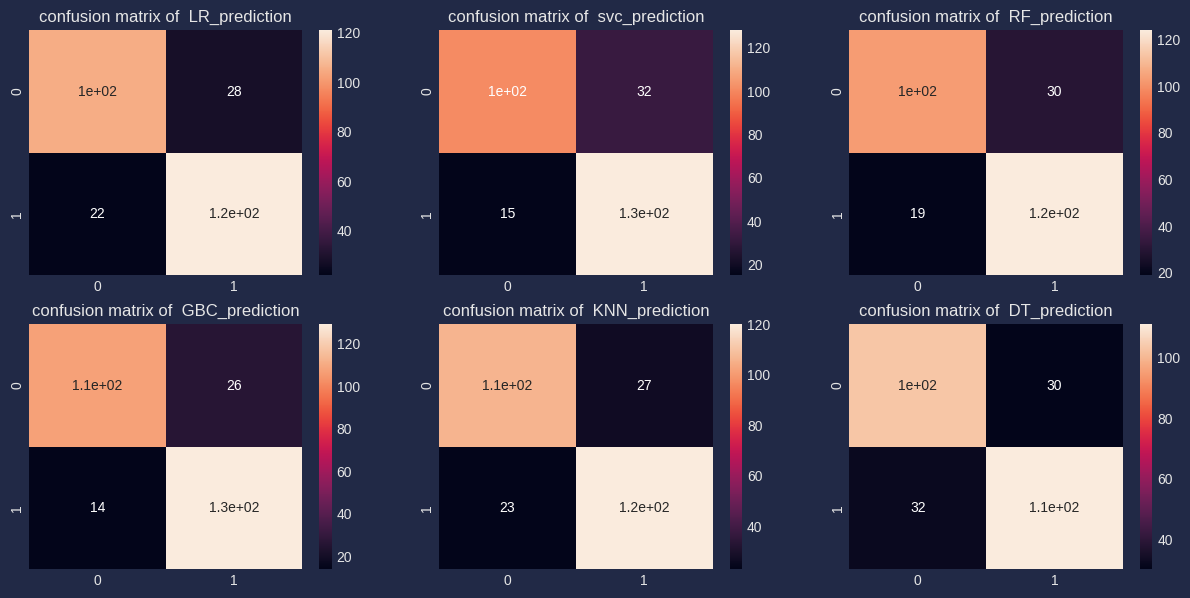

In [116]:
from sklearn.metrics import confusion_matrix

models_predictions=[LR_predict,svm_predict,rf_predict,GBC_predict,KNN_predict,dt_predict]
label={1:'LR_predict',2:'svc_predict',3:'RF_predict',4:'GBC_predict',5:'KNN_predict',6:'DT_predict'}
plt.figure(figsize=(15,7))
for n,model in enumerate(models_predictions,1) :
    cm = confusion_matrix(y_test,model)
    plt.subplot(2,3,n)
    sns.heatmap(cm,annot=True)
    plt.title('confusion matrix of  '+ label[n]+'ion')